In [58]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [59]:
lf = LabelEncoder()

In [60]:
a = ["one", "two", "three", "one", "two", "three"]

a = lf.fit_transform(a)

In [61]:
print(a)

[0 2 1 0 2 1]


In [62]:
b = lf.classes_
print(b)

['one' 'three' 'two']


In [63]:
dataset = pd.read_csv("/home/sudhakar/JPA_ML/housing_train.csv")
print(dataset.head())
print(dataset.columns)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [64]:
X = dataset[["LotArea","OverallQual", "OverallCond", "YearRemodAdd"]]
y = dataset[["SalePrice"]]

In [65]:
print(X.head())

   LotArea  OverallQual  OverallCond  YearRemodAdd
0     8450            7            5          2003
1     9600            6            8          1976
2    11250            7            5          2002
3     9550            7            5          1970
4    14260            8            5          2000


In [66]:
a = dataset[["Neighborhood"]].values
l = []
for i in a:
    l.append(i[0])
neighborhood_encoded = lf.fit_transform(l)
neighborhood_inversed = lf.inverse_transform(neighborhood_encoded)


neighborhood_dic = {}
for i in range(len(neighborhood_inversed)):
    neighborhood_dic[neighborhood_inversed[i]] = neighborhood_encoded[i]
print(neighborhood_dic)

{'CollgCr': 5, 'Veenker': 24, 'Crawfor': 6, 'NoRidge': 15, 'Mitchel': 11, 'Somerst': 21, 'NWAmes': 14, 'OldTown': 17, 'BrkSide': 3, 'Sawyer': 19, 'NridgHt': 16, 'NAmes': 12, 'SawyerW': 20, 'IDOTRR': 9, 'MeadowV': 10, 'Edwards': 7, 'Timber': 23, 'Gilbert': 8, 'StoneBr': 22, 'ClearCr': 4, 'NPkVill': 13, 'Blmngtn': 0, 'BrDale': 2, 'SWISU': 18, 'Blueste': 1}


In [67]:
X["Neighborhood"] = neighborhood_encoded

/home/sudhakar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
print(X.head())

   LotArea  OverallQual  OverallCond  YearRemodAdd  Neighborhood
0     8450            7            5          2003             5
1     9600            6            8          1976            24
2    11250            7            5          2002             5
3     9550            7            5          1970             6
4    14260            8            5          2000            15


In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [79]:
model = LinearRegression()
model.fit(x_train,y_train)
history = model.predict(x_test)
predicted = []
for i in history:
    predicted.append(i[0])
#print(predicted)
actual_val = y_test.values
actual = []
for i in actual_val:
    actual.append(i[0])
print(actual)

[228500, 216000, 150750, 134000, 90350, 159895, 220000, 240000, 213000, 181000, 138000, 244600, 89471, 110000, 145000, 281000, 129500, 137450, 230500, 149000, 335000, 202500, 254900, 317000, 250000, 160000, 181000, 438780, 120500, 93000, 262000, 128200, 301500, 231500, 109008, 83500, 149900, 193000, 501837, 134000, 154000, 157000, 118964, 154000, 133900, 275000, 219500, 135000, 245350, 116000, 170000, 119500, 217000, 120500, 163000, 176432, 168000, 175000, 279500, 125000, 423000, 173000, 127000, 239000, 260000, 85000, 127500, 173900, 186500, 252000, 61000, 230000, 97000, 139000, 137000, 179900, 274000, 143250, 135000, 224000, 183200, 221000, 87000, 116500, 125000, 162000, 213500, 402000, 164500, 161500, 143000, 189000, 139000, 116000, 158000, 146800, 100000, 315500, 185000, 169990, 142600, 108500, 85500, 176000, 133700, 250000, 79900, 140000, 180000, 106500, 135000, 143500, 220000, 172785, 119000, 141000, 166000, 152000, 284000, 140000, 128000, 149300, 263000, 249700, 140000, 235000, 2

In [72]:
count = []
for i in range(len(x_test)):
    count.append(i+1)
print(count)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

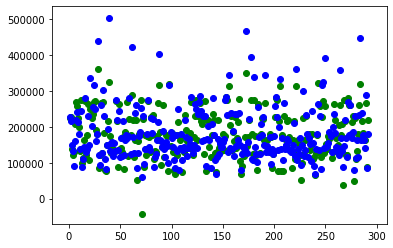

In [81]:
plt.scatter(count, predicted, color = "g")
plt.scatter(count, actual, color = "b")
plt.show()

In [8]:
import pandas as pd 
a = [1,2,4]
b = [2,4,5]
c = [2,3,5]
df = pd.DataFrame(columns = ["A", "B"])
df.at[0,'A'] = a
df.at[0,"B"] = b
df.at[1,"A"] = c
df.at[1,"B"] = c
print(df)


           A          B
0  [1, 2, 4]  [2, 4, 5]
1  [2, 3, 5]  [2, 3, 5]


In [10]:
import pandas as pd
import time

dataset = pd.read_csv("/home/sudhakar/PycharmProjects/Final_insider_threat/threat_Detection/Classifier1.csv")
for i in range(len(dataset)):
    a = dataset["Actual"][i][0]
    print(a[1])
    print(type(a))

IndexError: string index out of range